# Structure Learning

In [2]:
from sklearn.datasets import load_boston

In [6]:
bstn = load_boston()

In [9]:
import pandas as pd

df = pd.DataFrame(bstn.data, columns=bstn.feature_names)

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
import numpy as np

In [15]:
X = (df - df.mean())/df.std()

In [17]:
cov = X.cov()

In [18]:
acc = np.linalg.inv(cov)

In [21]:
df_acc = pd.DataFrame(acc, columns=df.columns, index=df.columns)

In [34]:
df_corr_part_scaler = np.sqrt(np.diag(df_acc).reshape(-1,1) @ np.diag(df_acc).reshape(-1,1).T)

In [35]:
df_corr_partial = df_acc / df_corr_part_scaler

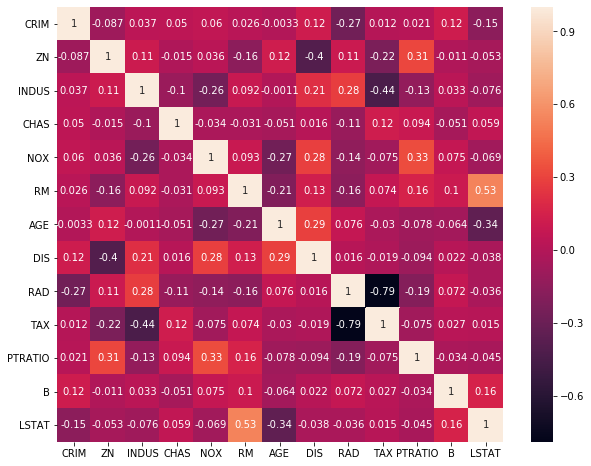

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df_corr_partial, annot=True)

In [36]:
df_acc.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.792192,-0.176906,0.099251,0.069415,0.167289,0.049012,-0.007876,0.311037,-0.977712,0.047616,0.037612,0.182527,-0.350608
ZN,-0.176906,2.298758,0.322131,-0.023198,0.113737,-0.328480,0.322145,-1.214303,0.438919,-1.015697,0.632811,-0.020089,-0.138160
INDUS,0.099251,0.322131,3.991596,-0.213270,-1.105465,0.255409,-0.003877,0.838852,1.521575,-2.626172,-0.348131,0.077167,-0.261071
CHAS,0.069415,-0.023198,-0.213270,1.073995,-0.072877,-0.044924,-0.092657,0.032501,-0.305064,0.376978,0.130193,-0.061750,0.105635
NOX,0.167289,0.113737,-1.105465,-0.072877,4.393720,0.272437,-0.978655,1.175405,-0.815201,-0.469311,0.926708,0.182237,-0.247222


In [55]:
import pandas as pd
import numpy as np

def calc_partial_corr(df:pd.DataFrame)->pd.DataFrame:
    """
    Parameters
    ----------    
    df : DataFrame, shape = [n_samples, n_features]
        dataset
        
    Returns
    -------
    df_partial_corr : DataFrame, shape = [n_features, n_features]
        partial correlation matrix
    """
    X = (df - df.mean())/df.std()
    cov = X.cov()
    df_acc = pd.DataFrame(np.linalg.inv(cov), columns=df.columns, index=df.columns)
    df_corr_part_scaler = np.sqrt(
        np.diag(df_acc).reshape(-1,1) @ np.diag(df_acc).reshape(-1,1).T
    )
    df_partial_corr = df_acc / df_corr_part_scaler
    return df_partial_corr